# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [4]:
cities

['castro',
 'luanda',
 'bluff',
 'qaanaaq',
 'barrow',
 'afmadu',
 'rikitea',
 'bagotville',
 'zabid',
 'yeppoon',
 'kapaa',
 'taolanaro',
 'kahului',
 'vung tau',
 'punta arenas',
 'jamestown',
 'victoria',
 'cherskiy',
 'lagoa',
 'vaini',
 'iqaluit',
 'vierzon',
 'aden',
 'nizhneyansk',
 'yellowknife',
 'bengkulu',
 'semirom',
 'ribeira grande',
 'mahebourg',
 'tautira',
 'norman wells',
 'pevek',
 'mareeba',
 'cidreira',
 'cape town',
 'luderitz',
 'zaysan',
 'inirida',
 'albany',
 'nikolskoye',
 'parras',
 'samusu',
 'saint-philippe',
 'ulladulla',
 'nijar',
 'khandyga',
 'shenjiamen',
 'sentyabrskiy',
 'labuhan',
 'winslow',
 'kodiak',
 'port elizabeth',
 'balakliya',
 'georgetown',
 'thompson',
 'dikson',
 'ilulissat',
 'elat',
 'bethel',
 'port alfred',
 'paamiut',
 'ornskoldsvik',
 'fortuna',
 'svetlyy',
 'belushya guba',
 'buraydah',
 'bubaque',
 'tuktoyaktuk',
 'mataura',
 'halalo',
 'geraldton',
 'havelock',
 'lubaczow',
 'severo-kurilsk',
 'hilo',
 'atuona',
 'kalavrita',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_looking_for = 'los angeles'
url = f"https://api.openweathermap.org/data/2.5/weather?q={city_looking_for}&appid={weather_api_key}"

In [6]:
response = requests.get(url).json()
response

{'coord': {'lon': -118.2437, 'lat': 34.0522},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 297.89,
  'feels_like': 297.62,
  'temp_min': 293.13,
  'temp_max': 304.93,
  'pressure': 1014,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 260},
 'clouds': {'all': 0},
 'dt': 1660450090,
 'sys': {'type': 1,
  'id': 3694,
  'country': 'US',
  'sunrise': 1660396391,
  'sunset': 1660444958},
 'timezone': -25200,
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city = response["name"]
lat = response["coord"]["lat"]
lng = response["coord"]["lon"]
max_temp = response["main"]["temp_max"]
humid = response["main"]["humidity"]
cloudiness = response["clouds"]["all"]
wind = response["wind"]["speed"]
country = response["sys"]["country"]
date = response["dt"]

city_weather = {"City":[city],"Lat":[lat],"Lng":[lng],"Max Temp":[max_temp],
                 "Humidity":[humid], "Cloudiness": [cloudiness], "Wind Speed":[wind],
                "Country":[country], "Date":[date]}
pd.DataFrame(city_weather)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Los Angeles,34.0522,-118.2437,304.93,46,0,3.6,US,1660450090


In [42]:
all_cities = []
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

for c in cities:
    response = requests.get(url + c).json()
    try:
        city = response["name"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        city_dict = {"City":city,"Lat":lat,"Lng":lng,"Max Temp":max_temp,
                     "Humidity":humid, "Cloudiness": cloudiness, "Wind Speed":wind,
                    "Country":country, "Date":date}
        all_cities.append(city_dict)
        print("Found " + c)
    except Exception as e:
        print("Could not find " + c)

waeather_df = pd.DataFrame(all_cities)
    

Found castro
Found luanda
Found bluff
Found qaanaaq
Found barrow
Could not find afmadu
Found rikitea
Found bagotville
Found zabid
Found yeppoon
Found kapaa
Could not find taolanaro
Found kahului
Found vung tau
Found punta arenas
Found jamestown
Found victoria
Found cherskiy
Found lagoa
Found vaini
Found iqaluit
Found vierzon
Found aden
Could not find nizhneyansk
Found yellowknife
Found bengkulu
Found semirom
Found ribeira grande
Found mahebourg
Found tautira
Found norman wells
Found pevek
Found mareeba
Found cidreira
Found cape town
Found luderitz
Found zaysan
Found inirida
Found albany
Found nikolskoye
Could not find parras
Could not find samusu
Found saint-philippe
Found ulladulla
Found nijar
Found khandyga
Found shenjiamen
Could not find sentyabrskiy
Found labuhan
Found winslow
Found kodiak
Found port elizabeth
Found balakliya
Found georgetown
Found thompson
Found dikson
Found ilulissat
Found elat
Found bethel
Found port alfred
Found paamiut
Found ornskoldsvik
Found fortuna
Found sv

Found aksarka
Found kosonsoy
Found bontang
Found vestmannaeyjar
Could not find andevoranto
Found bethanien
Found carutapera
Found auki
Found aleksandrovsk-sakhalinskiy
Found gouyave
Found pankrushikha
Found melhus
Found olafsvik
Found somerset east
Found mikkeli
Found asau
Found kuching
Found sola
Found samarai
Found muros
Found tamiahua
Found chiang khong
Found shelburne
Found sakaiminato
Could not find grand river south east
Found da nang
Found mount isa
Found devils lake
Found kununurra
Found kirakira
Found karratha
Found faya
Found moissac
Found petropavlovsk-kamchatskiy
Found saint-pierre
Found te anau
Found vuktyl
Found tanout
Found yueyang
Found zaraza
Found aitape
Found alyangula
Found cleburne
Found kulhudhuffushi
Found lerwick
Found naryan-mar
Found lima
Found pakxan
Found maromme
Found chinhoyi
Found nemyriv
Found kholm
Found launceston
Found koumac
Found mogocha
Found alofi
Found burnie
Found vanino
Found beloha
Found kimberley
Found manokwari
Found nevel
Found liberty
Foun

In [43]:
waeather_df.to_csv(output_data_file)

In [11]:
output_data = pd.read_csv(output_data_file)
output_data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,East London,-33.0153,27.9116,67.14,63,0,4.61,ZA,1659450570
1,1,Upernavik,72.7868,-56.1549,45.25,80,87,11.54,GL,1659450570
2,2,Rikitea,-23.1203,-134.9692,72.95,72,83,21.81,PF,1659450571
3,3,Inuvik,68.3499,-133.7218,48.96,100,100,10.36,CA,1659450571
4,4,Kharan,28.5833,65.4167,102.67,15,15,2.08,PK,1659450572


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = output_data.loc[(output_data["Humidity"] >= 100)]
humidity_df.head(6)

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,3,Inuvik,68.3499,-133.7218,48.96,100,100,10.36,CA,1659450571
142,142,Thompson,55.7435,-97.8558,55.56,100,100,0.00,CA,1659450628
171,171,Tuktoyaktuk,69.4541,-133.0374,48.20,100,100,10.36,CA,1659450640
214,214,Clyde River,70.4692,-68.5914,41.23,100,100,12.66,CA,1659450655
222,222,Peace River,56.2501,-117.2860,55.71,100,100,17.27,CA,1659450658
386,386,Udachny,66.4167,112.4000,46.45,100,100,17.36,RU,1659450735


In [13]:
humidity_df.count()

Unnamed: 0    6
City          6
Lat           6
Lng           6
Max Temp      6
Humidity      6
Cloudiness    6
Wind Speed    6
Country       6
Date          6
dtype: int64

In [14]:
reduced_humidity_df = output_data.loc[(output_data["Humidity"] < 100)]
reduced_humidity_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,East London,-33.0153,27.9116,67.14,63,0,4.61,ZA,1659450570
1,1,Upernavik,72.7868,-56.1549,45.25,80,87,11.54,GL,1659450570
2,2,Rikitea,-23.1203,-134.9692,72.95,72,83,21.81,PF,1659450571
4,4,Kharan,28.5833,65.4167,102.67,15,15,2.08,PK,1659450572
5,5,Agüimes,27.9054,-15.4461,83.03,54,20,29.93,ES,1659449997


In [15]:
reduced_humidity_df.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,287.019400,19.988972,17.054718,73.003298,68.280423,55.142857,8.414568,1.659451e+09
std,165.717962,32.727833,89.468767,13.954653,20.698168,39.176583,5.876487,2.303326e+02
min,0.000000,-54.800000,-179.166700,33.550000,7.000000,0.000000,0.000000,1.659450e+09
25%,143.500000,-7.067200,-60.702550,63.245000,58.000000,17.000000,4.340000,1.659451e+09
50%,288.000000,23.383300,21.178600,75.960000,72.000000,60.000000,6.910000,1.659451e+09
75%,430.500000,46.551100,96.785000,82.370000,84.000000,98.500000,10.970000,1.659451e+09
max,572.000000,78.218600,179.316700,115.140000,99.000000,100.000000,33.380000,1.659451e+09


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

del reduced_humidity_df['Unnamed: 0']
reduced_humidity_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,67.14,63,0,4.61,ZA,1659450570
1,Upernavik,72.7868,-56.1549,45.25,80,87,11.54,GL,1659450570
2,Rikitea,-23.1203,-134.9692,72.95,72,83,21.81,PF,1659450571
4,Kharan,28.5833,65.4167,102.67,15,15,2.08,PK,1659450572
5,Agüimes,27.9054,-15.4461,83.03,54,20,29.93,ES,1659449997


In [17]:
clean_city_data = reduced_humidity_df

In [18]:
clean_city_data.to_csv("output_data/clean_city_data.csv")

<AxesSubplot:ylabel='Frequency'>

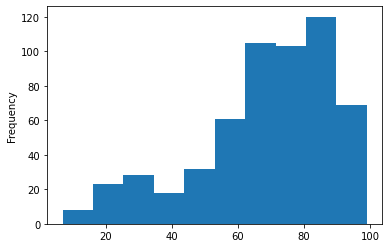

In [19]:
reduced_humidity_df["Humidity"].plot.hist()

Skip this step if there are no cities that have humidity > 100%.

Humidity(xlabel) and Frequency(ylabel) show that  majority of cities are in 68% ~ 90% humidity range.

<AxesSubplot:>

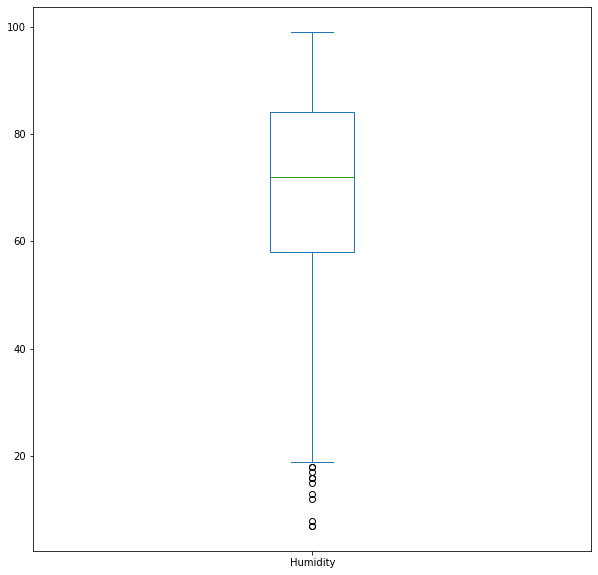

In [20]:
reduced_humidity_df["Humidity"].plot.box(figsize=(10,10))

The the median of humidity is 72% 
Values below 19% could be outliers.
Values above 123% could be outliers.

In [21]:
reduced_humidity_df["Humidity"].describe()

count    567.000000
mean      68.280423
std       20.698168
min        7.000000
25%       58.000000
50%       72.000000
75%       84.000000
max       99.000000
Name: Humidity, dtype: float64

In [22]:
reduced_humidity_df["Humidity"].quantile([.25,.5,.75])

0.25    58.0
0.50    72.0
0.75    84.0
Name: Humidity, dtype: float64

In [23]:
quartiles = reduced_humidity_df["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(lowerq, upperq)
print("INNER QUARTILE RANGE", iqr)

58.0 84.0
INNER QUARTILE RANGE 26.0


In [24]:
quartiles = reduced_humidity_df["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of reduced_humidity_df.head() is: {lowerq}")
print(f"The upper quartile of reduced_humidity_df.head() is: {upperq}")
print(f"The interquartile range of reduced_humidity_df.head() is: {iqr}")
print(f"The the median of reduced_humidity_df.head() is: {quartiles[.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of reduced_humidity_df.head() is: 58.0
The upper quartile of reduced_humidity_df.head() is: 84.0
The interquartile range of reduced_humidity_df.head() is: 26.0
The the median of reduced_humidity_df.head() is: 72.0 
Values below 19.0 could be outliers.
Values above 123.0 could be outliers.


In [25]:
reduced_humidity_df.loc[reduced_humidity_df["Humidity"] < lower_bound]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Kharan,28.5833,65.4167,102.67,15,15,2.08,PK,1659450572
94,Fes,34.0372,-4.9998,109.65,7,0,5.75,MA,1659450602
117,Sabzawār,36.2126,57.6819,92.48,16,20,0.00,IR,1659450617
137,Zambezi,-13.5432,23.1047,87.62,16,50,5.53,ZM,1659450626
192,Sakakah,29.9697,40.2064,112.57,8,11,1.23,SA,1659450647
282,Jalu,29.0331,21.5482,98.19,18,0,13.24,LY,1659450691
283,Taoudenni,22.6783,-3.9836,115.14,7,5,7.07,ML,1659450147
376,Aswān,24.0934,32.9070,105.06,12,83,14.47,EG,1659450729
456,Urmia,37.5527,45.0761,94.55,17,40,11.50,IR,1659450766
518,Susa,32.1942,48.2436,114.44,18,16,10.98,IR,1659450798


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

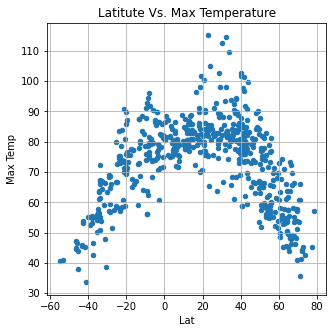

In [26]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(5,5),
              title="Latitute Vs. Max Temperature")
plt.show()

In [44]:
plt.savefig("Image/LatituteMaxTemp.png")

<Figure size 432x288 with 0 Axes>

Latitute ranges(-60 to -20 and 60 to 80) have lower max temperatur( mid 30s to 70s)
Latutute ranges(-20 to 60 )have hier max temperature (70 to 110) which are shown as high density of cluster.

## Latitude vs. Cloudiness Plot

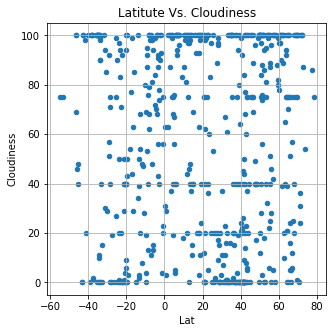

In [27]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(5,5),
              title="Latitute Vs. Cloudiness")
plt.show()

In [45]:
plt.savefig("Image/LatituteCloudiness.png")

<Figure size 432x288 with 0 Axes>

Cloudness is scattered all over the Latitute ranges(-50 to 70)

## Latitude vs. Humidity Plot

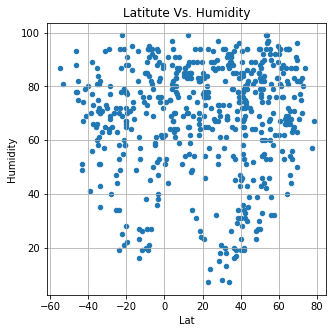

In [46]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(5,5),
              title="Latitute Vs. Humidity")
plt.show()

In [47]:
plt.savefig("Image/LatituteHumidity.png")

<Figure size 432x288 with 0 Axes>

Latitute ranges(-40 to 70) have high Humidity which is shown as high density of cluster(60 to 100) 

## Latitude vs. Wind Speed Plot

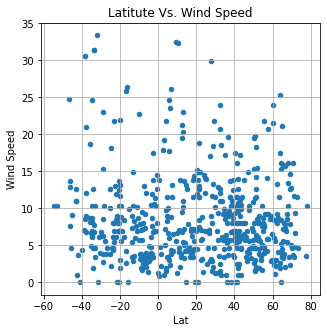

In [29]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(5,5),
              title="Latitute Vs. Wind Speed")
plt.show()

In [48]:
plt.savefig("Image/LatituteWindSpeed.png")

<Figure size 432x288 with 0 Axes>

Overall, Latitute ranges(-40 to 70) have high lower Wind Speed which is shown as high density of cluster(0-15) 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
noth_hamisphere = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
noth_hamisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Upernavik,72.7868,-56.1549,45.25,80,87,11.54,GL,1659450570
4,Kharan,28.5833,65.4167,102.67,15,15,2.08,PK,1659450572
5,Agüimes,27.9054,-15.4461,83.03,54,20,29.93,ES,1659449997
7,Baraboo,43.4711,-89.7443,73.54,81,0,4.61,US,1659450544
8,Węgrów,52.3995,22.0163,77.92,44,18,8.25,PL,1659450573


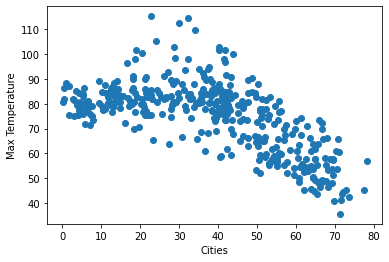

In [31]:
x_values = noth_hamisphere['Lat']
y_values = noth_hamisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Cities')
plt.ylabel('Max Temperature')
plt.show()

In [50]:
plt.savefig("Image/NorthernHemisphereMaxTempLat.png")

<Figure size 432x288 with 0 Axes>

In Northern Hemisohere, Latitute ranges(0 to mid 40s) have 70 to 90 Max Temperature and 
Latitute ranges(from mid 40s to 70) have lower max temperature 40 to 70 

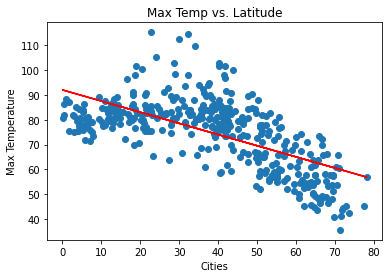

In [32]:
x_values = noth_hamisphere['Lat']
y_values = noth_hamisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Max Temperature')
plt.title("Max Temp vs. Latitude")
plt.show()

In [51]:
plt.savefig("Image/NorthernHemisphereMaxTempLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Northern Hemisohere, as red line shows, higher Latitute cities have lower max temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
south_hamisphere = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
south_hamisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,67.14,63,0,4.61,ZA,1659450570
2,Rikitea,-23.1203,-134.9692,72.95,72,83,21.81,PF,1659450571
6,Hithadhoo,-0.6000,73.0833,81.30,72,23,14.54,MV,1659450572
10,Bluff,-46.6000,168.3333,44.80,78,69,24.79,NZ,1659450573
11,Bredasdorp,-34.5322,20.0403,63.82,51,10,6.31,ZA,1659450574


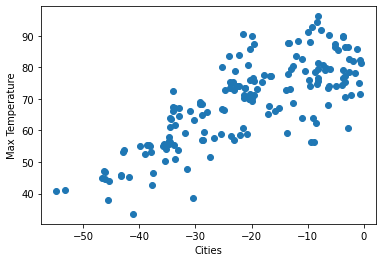

In [34]:
x_values = south_hamisphere['Lat']
y_values = south_hamisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Cities')
plt.ylabel('Max Temperature')
plt.show()

In [52]:
plt.savefig("Image/SouthernHemisphereMaxTempLat.png")

<Figure size 432x288 with 0 Axes>

In Southern Hemisohere, Latitute ranges(mid -40s to mid -20s) have lower Max Temperature 40 to 70  and 
Latitute ranges(from mid -20s to 0) have higher max temperature 70 to 90 

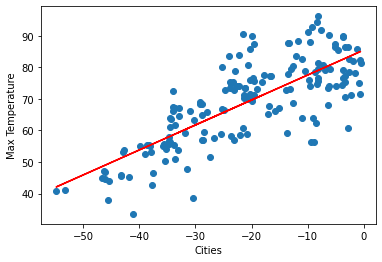

In [35]:
x_values = south_hamisphere['Lat']
y_values = south_hamisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Max Temperature')
plt.show()

In [53]:
plt.savefig("Image/SouthernHemisphereMaxTempLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
In Southern Hemisohere, as red line shows, cities further from  Latitute 0 have lower max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

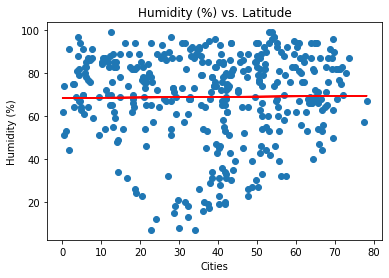

In [36]:
x_values = noth_hamisphere['Lat']
y_values = noth_hamisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude")
plt.show()

In [54]:
plt.savefig("Image/NorthernHemisphereHumidityLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Northern Hemisohere, as the red line shows, humidity ranges are 60 to 100 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

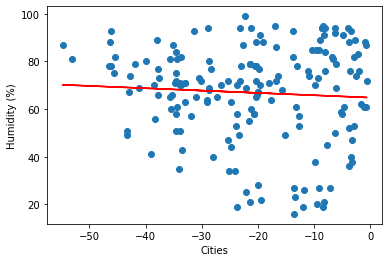

In [37]:
x_values = south_hamisphere['Lat']
y_values = south_hamisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Humidity (%)')
plt.show()

In [55]:
plt.savefig("Image/SouthernHemisphereHumidityLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Southern Hemisohere, as red line shows, humidity ranges are 60 to 70 and 
cities closer to Latitute 0 have the lower humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

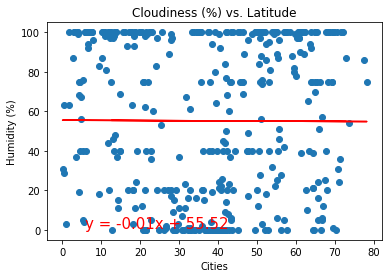

In [38]:
x_values = noth_hamisphere['Lat']
y_values = noth_hamisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Humidity (%)')
plt.title("Cloudiness (%) vs. Latitude")
plt.show()

In [56]:
plt.savefig("Image/NorthernHemisphereCloudinessLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Northern Hemisohere, as red line shows, avarage humidity is mid-late 50s through out Latitute ranges(0 to 80)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

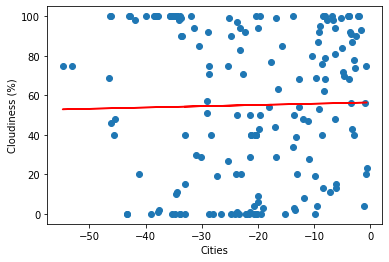

In [39]:
x_values = south_hamisphere['Lat']
y_values = south_hamisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Cloudiness (%)')
plt.show()

In [57]:
plt.savefig("Image/SouthernHemisphereCloudinessLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Southern Hemisohere, as red line shows, average humidity is slightly higher cities closer to Latitute 0 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

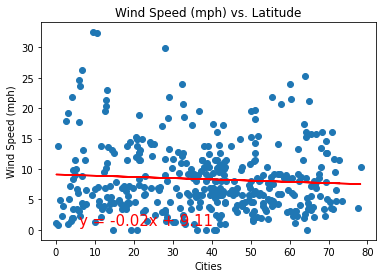

In [40]:
x_values = noth_hamisphere['Lat']
y_values = noth_hamisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude")
plt.show()

In [58]:
plt.savefig("Image/NorthernHemisphereWind SpeedLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Northern Hemisohere, as red line shows, higher Latitute cities have lower average wind speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

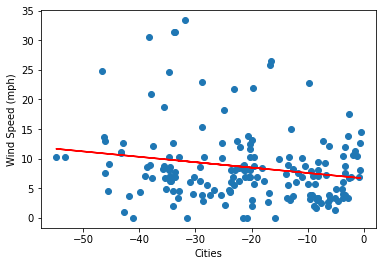

In [41]:
x_values = south_hamisphere['Lat']
y_values = south_hamisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [59]:
plt.savefig("Image/SouthernHemisphereWind SpeedLatLinearRegression.png")

<Figure size 432x288 with 0 Axes>

In Souther Hemisphere, as red line shows, cities closer to Latitute 0 have lower average wind speed

In Northern Hemisphere, higher Latitute cities have lower max temperature and lower wind speed.
Latitute ranges(0 to 80)' avarage humidity is mid 50s through out and humidity ranges are 60 to 100.
In Southern Hemisphere, cities closer to Latitute 0 have the lower humidity, lower average wind speed.
however, cities further from  Latitute 0 have lower max temperature.